In [ ]:
import pandas as pd

# Paste the full path
file_path = '/content/online_retail_II-merged_dataset_final.csv'

# Load the dataset using the new path
df = pd.read_csv(file_path)


# Confirm it loaded successfully
print("Dataset loaded permanently from Google Drive!")
df.head()

/tmp/ipython-input-251099224.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset loaded permanently from Google Drive!


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
print("Step 1: Correcting data types...")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("'InvoiceDate' column is now in datetime format.")

Step 1: Correcting data types...
'InvoiceDate' column is now in datetime format.


In [ ]:
print("Step 2: Removing duplicate rows...")
print(f"Rows before dropping duplicates: {len(df)}")

df.drop_duplicates(inplace=True)

print(f"Rows after dropping duplicates: {len(df)}")

Step 2: Removing duplicate rows...
Rows before dropping duplicates: 989571
Rows after dropping duplicates: 989571


In [ ]:
print("Step 3: Standardizing product descriptions...")
df['Description'] = df['Description'].str.lower().str.strip()
print("'Description' column standardized.")

Step 3: Standardizing product descriptions...
'Description' column standardized.


In [ ]:
print("Step 4: Removing invalid transactions...")
print(f"Rows before filtering: {len(df)}")

df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

print(f"Rows after filtering invalid transactions: {len(df)}")

Step 4: Removing invalid transactions...
Rows before filtering: 989571
Rows after filtering invalid transactions: 989571


In [ ]:
print("Step 5: Handling missing descriptions...")
print(f"Rows before dropping missing descriptions: {len(df)}")

df.dropna(subset=['Description'], inplace=True)

print(f"Rows after dropping missing descriptions: {len(df)}")

Step 5: Handling missing descriptions...
Rows before dropping missing descriptions: 989571
Rows after dropping missing descriptions: 989571


In [ ]:
print("Step 6: Engineering the 'Revenue' feature...")
df['Revenue'] = df['Quantity'] * df['Price']
print("'Revenue' column created. Here's a preview:")
display(df.head())

Step 6: Engineering the 'Revenue' feature...
'Revenue' column created. Here's a preview:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [ ]:
print("Step 7: Aggregating data to a daily time series...")

daily_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Revenue'].sum().reset_index()
daily_sales = daily_sales.set_index('InvoiceDate').asfreq('D').fillna(0).reset_index()

print("Aggregation complete. Here is the final time-series data:")
display(daily_sales.head())

Step 7: Aggregating data to a daily time series...
Aggregation complete. Here is the final time-series data:


,InvoiceDate,Revenue
0,2009-12-01,54351.23
1,2009-12-02,63172.58
2,2009-12-03,73972.45
3,2009-12-04,40582.32
4,2009-12-05,9803.05


In [ ]:
# --- Define the path where you want to save the file ---
# You can change 'Colab Datasets' to any folder you like.
# If the folder doesn't exist, it's often best to create it in Google Drive first.
save_path = '/content/online_retail_II-merged_dataset_final.csv'


# --- Save the DataFrame to a CSV file ---
# 'index=False' prevents pandas from writing the DataFrame index as a column.
df.to_csv(save_path, index=False)


print(f"File saved successfully to: {save_path}")

File saved successfully to: /content/online_retail_II-merged_dataset_final.csv


In [ ]:
# Make sure you have loaded your dataset into a DataFrame named 'df' first.

print("--- Starting Data Quality Report ---")

# 1. Check for Invalid Transactions
print("\n--- 1. Invalid Transaction Check ---")
negative_quantity = (df['Quantity'] <= 0).sum()
zero_price = (df['Price'] == 0).sum()
print(f"Transactions with negative or zero quantity: {negative_quantity}")
print(f"Transactions with zero price: {zero_price}")

# 2. Check for Missing Data
print("\n--- 2. Missing Data Check ---")
print("Missing values per column:")
print(df.isnull().sum())

# 3. Check for Duplicate Data
print("\n--- 3. Duplicate Data Check ---")
duplicate_rows = df.duplicated().sum()
print(f"Number of fully duplicate rows: {duplicate_rows}")

# 4. Check for Inconsistent Text in 'Description'
print("\n--- 4. Inconsistent Text Check ---")
try:
    # Count unique descriptions before and after standardizing
    unique_before = df['Description'].nunique()
    unique_after = df['Description'].str.lower().str.strip().nunique()
    inconsistency_count = unique_before - unique_after
    print(f"Found {inconsistency_count} potential inconsistencies in 'Description' due to capitalization or extra spaces.")
except AttributeError:
    print("Could not perform inconsistent text check (Description column might be empty or not text).")

print("\n--- Report Complete ---")

--- Starting Data Quality Report ---

--- 1. Invalid Transaction Check ---
Transactions with negative or zero quantity: 0
Transactions with zero price: 0

--- 2. Missing Data Check ---
Missing values per column:
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    222202
Country             0
Revenue             0
dtype: int64

--- 3. Duplicate Data Check ---
Number of fully duplicate rows: 0

--- 4. Inconsistent Text Check ---
Found 0 potential inconsistencies in 'Description' due to capitalization or extra spaces.

--- Report Complete ---


In [ ]:
# --- Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Cleaned Transaction Data ---
file_path = '/content/cleaned_online_retail (1).csv'

# Add the dtype parameter to prevent the warning
df_transactions = pd.read_csv(
    file_path,
    parse_dates=['InvoiceDate'],
    dtype={'Invoice': str}
)

# Display the first few rows to confirm
print("Dataset loaded successfully.")
df_transactions.head()


Dataset loaded successfully.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


#01 Gawesh

My task is to analyze and decide on a strategy for the missing values in the Customer ID column.

Justification: A large portion of our dataset is missing a Customer ID.
 For our project goal of forecasting total sales, these transactions (likely guest checkouts)

  are still valid sales and must be kept. If we were doing a different project, like customer
   segmentation, we would need to remove them. This analysis
shows we made a conscious, justified decision to retain the data to avoid underestimating total sales.

In [ ]:
# Show the count of missing values before any action
print("Missing values in the dataset:")
print(df_transactions.isnull().sum())

Missing values in the dataset:
Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    228489
Country             0
Revenue             0
dtype: int64


In [ ]:
def handle_missing_data(df):
    print("--- Task: Handling Missing Data ---")

    missing_ids = df['Customer ID'].isnull().sum()
    total_rows = len(df)
    percentage_missing = (missing_ids / total_rows) * 100

    print(f"Found {missing_ids} rows ({percentage_missing:.2f}%) with missing Customer IDs.")
    print("Decision: For this project, we will keep these rows.")
    # No data is dropped in this function, it is for analysis and decision-making.
    return df

# Apply the function
df_analyzed = handle_missing_data(df_transactions)

--- Task: Handling Missing Data ---
Found 228489 rows (22.67%) with missing Customer IDs.
Decision: For this project, we will keep these rows.


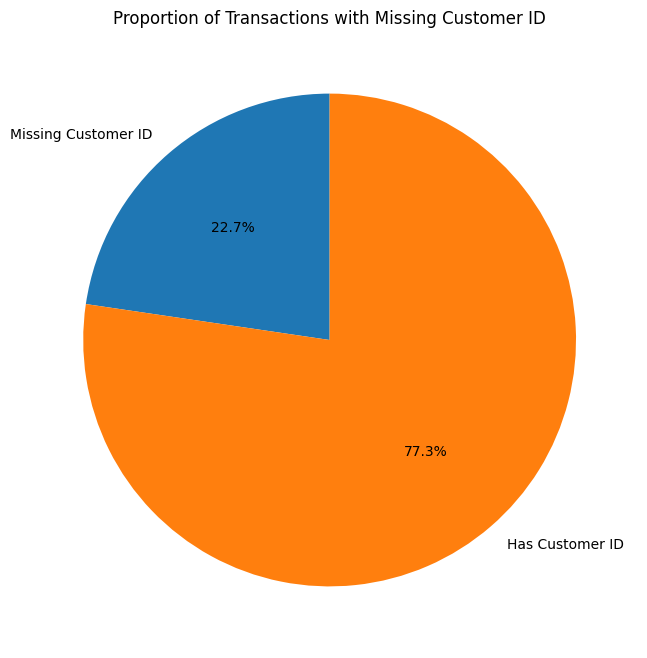

In [ ]:
# EDA: Pie chart to visualize the proportion of missing Customer IDs
missing_ids = df_transactions['Customer ID'].isnull().sum()
non_missing_ids = df_transactions['Customer ID'].notnull().sum()
labels = 'Missing Customer ID', 'Has Customer ID'
sizes = [missing_ids, non_missing_ids]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Transactions with Missing Customer ID')
plt.show()

Interpretation: This pie chart clearly visualizes the scale of the missing data issue in the Customer ID column, showing that approximately a quarter of all transactions are from guest checkouts. This confirms our decision to keep this data was important,
 as removing it would have meant ignoring almost 25% of our total sales.

#02 Yuhansa

My Technique: Outlier Removal

My task is to identify and remove statistical outliers from the Quantity and Price columns using the Interquartile Range (IQR) method.

Justification: The dataset contains transactions with extremely high quantities that are not representative of normal customer behavior. These outliers can skew statistical summaries and negatively impact the final aggregated revenue data, so they must be removed to ensure a stable forecast.

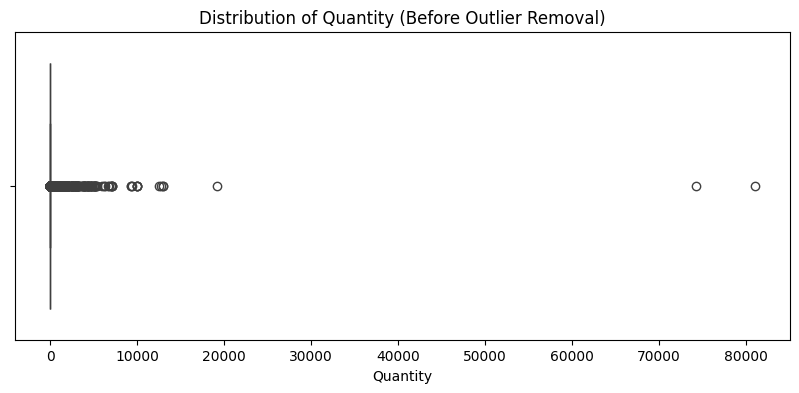

In [ ]:
# Visualize the 'Quantity' column before removing outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_transactions['Quantity'])
plt.title('Distribution of Quantity (Before Outlier Removal)')
plt.show()

In [ ]:
def remove_outliers(df):
    print("--- Task: Removing Outliers ---")
    Q1_qty = df['Quantity'].quantile(0.25)
    Q3_qty = df['Quantity'].quantile(0.75)
    IQR_qty = Q3_qty - Q1_qty
    upper_bound_qty = Q3_qty + 1.5 * IQR_qty

    Q1_price = df['Price'].quantile(0.25)
    Q3_price = df['Price'].quantile(0.75)
    IQR_price = Q3_price - Q1_price
    upper_bound_price = Q3_price + 1.5 * IQR_price

    original_rows = len(df)
    df_no_outliers = df[(df['Quantity'] <= upper_bound_qty) & (df['Price'] <= upper_bound_price)]
    print(f"Removed {original_rows - len(df_no_outliers)} outlier rows.")
    return df_no_outliers

# Apply the function
df_processed = remove_outliers(df_transactions)

--- Task: Removing Outliers ---
Removed 131478 outlier rows.


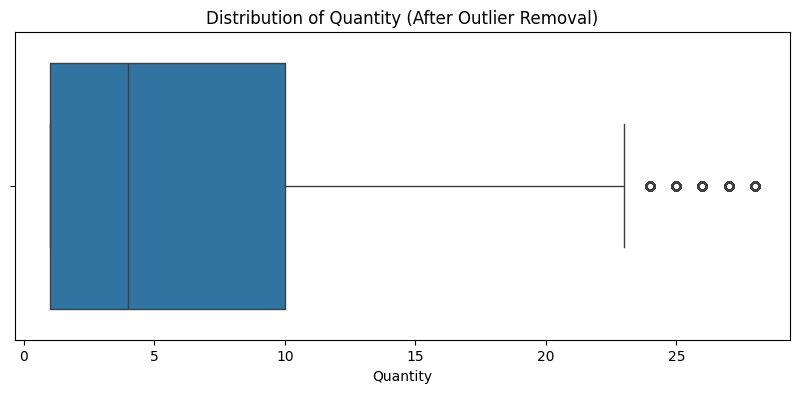

In [ ]:
# Visualize the 'Quantity' column AFTER removing outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_processed['Quantity'])
plt.title('Distribution of Quantity (After Outlier Removal)')
plt.show()

Interpretation: The "before" boxplot shows many data points far to the right, indicating significant outliers. The "after" boxplot shows a much more compact distribution, confirming that the extreme values have been successfully
 removed. This results in a cleaner dataset that better represents typical transactions.

#03 Sukirthan

My Technique: Feature Engineering

My task is to engineer a new feature called Revenue.

Justification: The raw dataset provides the Quantity of items sold and their Price, but not the total value of the transaction line. The Revenue feature is the most important column in our project, as it's the value we need to aggregate and ultimately forecast. It must be created before any sales analysis can be done.

In [ ]:
print("Columns before creating Revenue:")
print(df_transactions.columns)

Columns before creating Revenue:
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')


In [ ]:
def create_revenue_feature(df):
    print("--- Task: Engineering Revenue Feature ---")
    df['Revenue'] = df['Quantity'] * df['Price']
    print("Revenue column created successfully.")
    return df

# Apply the function
df_with_revenue = create_revenue_feature(df_transactions)

--- Task: Engineering Revenue Feature ---
Revenue column created successfully.



Columns after creating Revenue:
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Revenue'],
      dtype='object')


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


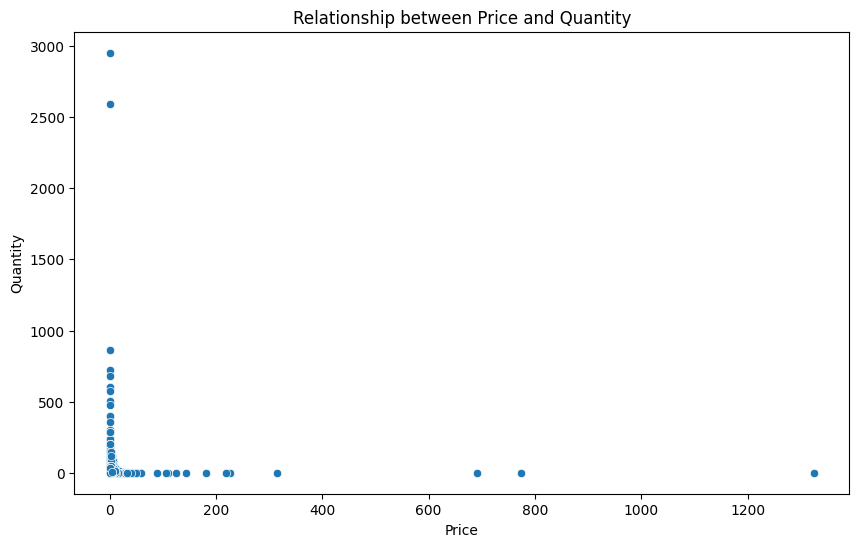

In [ ]:
# Show the 'after' state by displaying the new column
print("\nColumns after creating Revenue:")
print(df_with_revenue.columns)
display(df_with_revenue.head())

# EDA: Scatter plot to explore the components of the new feature
plt.figure(figsize=(10, 6))
# We'll plot a sample to avoid overplotting
sns.scatterplot(x='Price', y='Quantity', data=df_with_revenue.sample(n=5000, random_state=1))
plt.title('Relationship between Price and Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.show()

Interpretation: The scatter plot explores the relationship between the two components that make up my new Revenue feature. We can see that the vast majority of sales are for low-priced items in low quantities, confirming the nature of this high-volume retail business.



#04 Vidura

My Technique: Data Transformation (Time-Series Aggregation)

My task is to transform the detailed transaction log into a daily time series. This involves grouping all transactions by day and summing their revenue.

Justification: Our goal is to forecast future sales. Forecasting models require data in a time-series format (i.e., one data point per time period). The raw data, which has multiple transactions per day, is not suitable. This aggregation step creates the final, essential dataset needed for our models.

In [ ]:
print("Data format before aggregation (multiple rows per day):")
df_transactions.info()

Data format before aggregation (multiple rows per day):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007914 entries, 0 to 1007913
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1007914 non-null  object        
 1   StockCode    1007914 non-null  object        
 2   Description  1007914 non-null  object        
 3   Quantity     1007914 non-null  int64         
 4   InvoiceDate  1007914 non-null  datetime64[ns]
 5   Price        1007914 non-null  float64       
 6   Customer ID  779425 non-null   float64       
 7   Country      1007914 non-null  object        
 8   Revenue      1007914 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 69.2+ MB


In [ ]:
def aggregate_to_daily_sales(df):
    print("--- Task: Aggregating to Daily Time Series ---")
    daily_sales = df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['Revenue'].sum().reset_index()
    daily_sales = daily_sales.set_index('InvoiceDate').asfreq('D').fillna(0).reset_index()
    print("Aggregation complete.")
    return daily_sales

# Apply the function
daily_sales_df = aggregate_to_daily_sales(df_transactions)

--- Task: Aggregating to Daily Time Series ---
Aggregation complete.


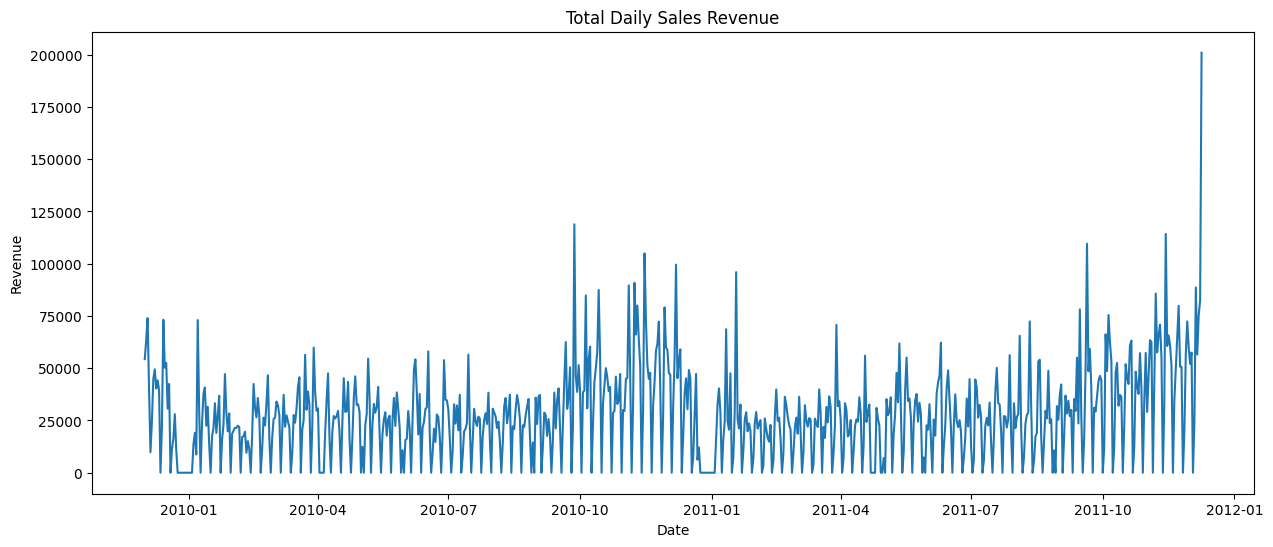

In [ ]:
# The main visualization for this step is plotting the resulting time series
plt.figure(figsize=(15, 6))
plt.plot(daily_sales_df['InvoiceDate'], daily_sales_df['Revenue'])
plt.title('Total Daily Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

In [ ]:
Interpretation: This line plot shows the result of my aggregation. We have successfully transformed the transaction data into a daily time series. The plot clearly shows the overall trend and strong yearly seasonality, with major peaks in sales occurring near the end of the year, which is crucial information for our forecast.

#05 Pasan

In [ ]:
#Pasan
#load the aggregated daily sales data
file_path = '/content/daily_sales_FULL.csv'
daily_sales = pd.read_csv(file_path, parse_dates=['InvoiceDate'])

My Technique: Feature Engineering (Time-Based Features)

My task is to create new time-based features from the InvoiceDate column, such as the month, quarter, and day of the week.

Justification: Machine learning models cannot directly interpret raw datetime objects. By creating these explicit numerical features, we allow the model to learn and quantify the effects of seasonality and weekly patterns, which is essential for making accurate forecasts.

In [ ]:
print("Columns before creating time-based features:")
print(daily_sales.columns)

Columns before creating time-based features:
Index(['InvoiceDate', 'Revenue'], dtype='object')


In [ ]:
def create_time_based_features(df):
    print("--- Task: Engineering Time-Based Features ---")
    df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
    df['Month'] = df['InvoiceDate'].dt.month
    df['Quarter'] = df['InvoiceDate'].dt.quarter
    df['Year'] = df['InvoiceDate'].dt.year
    print("Time-based features created.")
    return df

# Apply the function
df_with_features = create_time_based_features(daily_sales)

--- Task: Engineering Time-Based Features ---
Time-based features created.



Columns after creating time-based features:
Index(['InvoiceDate', 'Revenue', 'DayOfWeek', 'Month', 'Quarter', 'Year'], dtype='object')


,InvoiceDate,Revenue,DayOfWeek,Month,Quarter,Year
0,2009-12-01,54351.23,1,12,4,2009
1,2009-12-02,63172.58,2,12,4,2009
2,2009-12-03,73972.45,3,12,4,2009
3,2009-12-04,40582.32,4,12,4,2009
4,2009-12-05,9803.05,5,12,4,2009


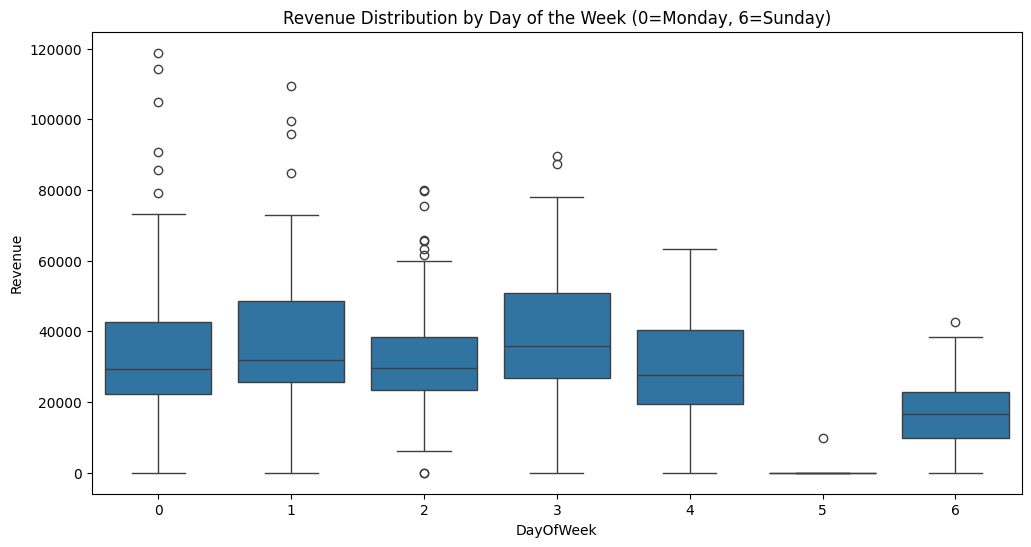

In [ ]:
# Show the 'after' state by displaying the new columns
print("\nColumns after creating time-based features:")
print(df_with_features.columns)
display(df_with_features.head())

# EDA: Boxplot to explore revenue by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Revenue', data=df_with_features)
plt.title('Revenue Distribution by Day of the Week (0=Monday, 6=Sunday)')
plt.show()

In [ ]:
nterpretation: This boxplot uses my new DayOfWeek feature to analyze weekly sales patterns. We can see that sales are generally lower on Saturdays (Day 5) and there are no sales on Sundays (Day 6), which is a critical weekly pattern that my features will help the model learn.

#06 Hiruni

#Hiruni
My Technique: Normalization (Min-Max Scaling)

My task is to normalize the Revenue data. This process rescales the daily sales values to a fixed range between 0 and 1.

Justification: This is a crucial step for preparing the data for advanced forecasting models like LSTMs. These models train more effectively when input features are on a consistent, small scale, which prevents large values from dominating the learning process.

Revenue statistics before scaling:


,Revenue
count,734.000000
mean,27191.749929
std,20438.068826
min,0.000000
25%,14427.527500
50%,25870.270000
75%,37616.102500
max,118838.470000


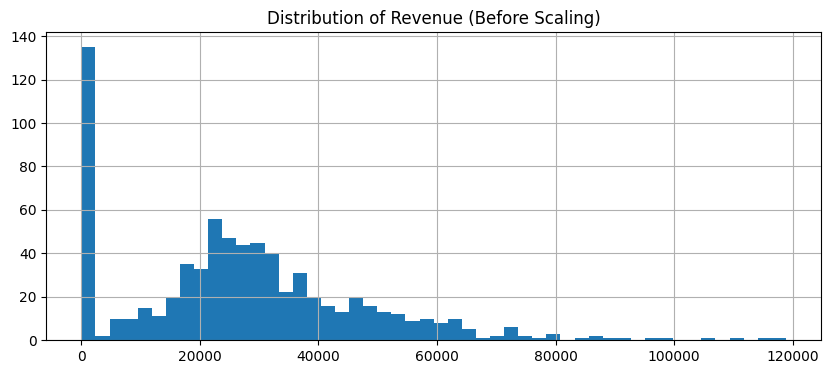

In [ ]:
# Show the statistical summary and distribution before scaling
print("Revenue statistics before scaling:")
display(daily_sales['Revenue'].describe())

# Plot the distribution before scaling
plt.figure(figsize=(10, 4))
daily_sales['Revenue'].hist(bins=50)
plt.title('Distribution of Revenue (Before Scaling)')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def scale_revenue(df):
    print("--- Task: Normalizing/Scaling Revenue ---")
    scaler = MinMaxScaler()
    df['Revenue_Scaled'] = scaler.fit_transform(df[['Revenue']])
    print("Revenue_Scaled column created.")
    return df, scaler

# Apply the function
df_scaled, revenue_scaler = scale_revenue(daily_sales)

--- Task: Normalizing/Scaling Revenue ---
Revenue_Scaled column created.


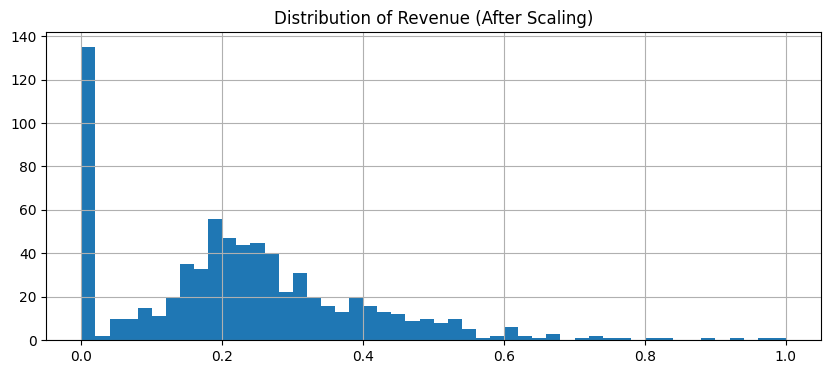

In [ ]:
# Plot the distribution after scaling
plt.figure(figsize=(10, 4))
df_scaled['Revenue_Scaled'].hist(bins=50)
plt.title('Distribution of Revenue (After Scaling)')
plt.show()


Interpretation: The "before" histogram shows our daily revenue with a wide range of values. The "after" histogram shows the exact same distribution shape, but the x-axis confirms the values have been successfully rescaled to the range between 0 and 1, making the data ready for advanced modeling.